In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
import joblib

%matplotlib inline

# Ambil Data

In [2]:
df = pd.read_csv('dataset/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(42000, 785)

<AxesSubplot:xlabel='label', ylabel='count'>

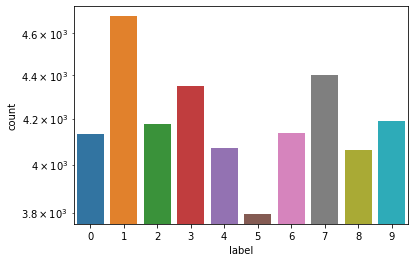

In [4]:
sns.countplot(x='label', data=df, log = True)

In [5]:
df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

# Cek Null Data 

In [6]:
df.isnull().sum().max()

0

# Cek Duplicated Data 

In [7]:
df.duplicated().any()

False

In [8]:
df.iloc[:, 1:].duplicated().any()

False

# Split Data Prediktor dan Data Target

In [9]:
X_df = df.iloc[:, 1:]
X_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y_df = df.iloc[:, 0:1]
y_df.head()

,label
0,1
1,0
2,1
3,4
4,0


# Mengubah Tipe Data Prediktor Menjadi Float dan Target Menjadi Int

In [11]:
X_df.dtypes.unique()

array([dtype('int64')], dtype=object)

In [12]:
X_df = X_df.astype('float')
X_arr = X_df.to_numpy()
X_arr.dtype

dtype('float64')

In [13]:
y_df.dtypes.unique()

array([dtype('int64')], dtype=object)

In [14]:
y_df = y_df.astype('category')
y_arr = y_df.to_numpy().T[0]
y_arr.dtype

dtype('int64')

# Resizing Gambar

In [15]:
np.sqrt(X_arr.shape[1])

28.0

ukuran gambar telah 28x28 piksel tidak perlu diperkecil lagi

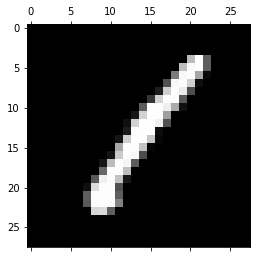

In [16]:
plt.matshow(X_arr[0].reshape((28,28)), cmap='gray', vmin=0, vmax=255)

# Feature Scaling 

In [17]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X_arr)

# Split Data Training dan Data Testing

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y_arr, train_size=0.8, test_size=0.2, random_state=42)

In [20]:
print("Data Training : ", X_train.shape)
print("Data Training : ", y_train.shape)
print("Data Testing : ", X_test.shape)
print("Data Testing : ", y_test.shape)

Data Training :  (33600, 784)
Data Training :  (33600,)
Data Testing :  (8400, 784)
Data Testing :  (8400,)


# Membangun Model

In [21]:
model_file = "grid_search_model.pkl"

In [22]:
# Load Model
model = joblib.load(model_file)

In [23]:
# # Training Model
# params = {'C': [0.3, 0.6, 1, 3, 6, 10],
#          'gamma': ['scale', 'auto']}
# model = GridSearchCV(estimator=SVC(), param_grid=params, cv=3, verbose=3)
# model.fit(X_train, y_train)

In [24]:
model_results_df = pd.DataFrame(model.cv_results_)
model_results_df = model_results_df.sort_values(by=['rank_test_score'])
model_results_df = (
    model_results_df
    .set_index(model_results_df["params"].apply(
        lambda x: "_".join(str(val) for val in x.values()))
    )
    .rename_axis('kernel')
)
model_results_df[
    ['params', 'rank_test_score', 'mean_test_score', 'std_test_score']
]

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
6_auto,"{'C': 6, 'gamma': 'auto'}",1,0.961399,0.000084
10_auto,"{'C': 10, 'gamma': 'auto'}",2,0.961101,0.000223
10_scale,"{'C': 10, 'gamma': 'scale'}",3,0.961071,0.000695
6_scale,"{'C': 6, 'gamma': 'scale'}",4,0.960923,0.000719
3_auto,"{'C': 3, 'gamma': 'auto'}",5,0.960714,0.000219
3_scale,"{'C': 3, 'gamma': 'scale'}",6,0.960565,0.000730
1_scale,"{'C': 1, 'gamma': 'scale'}",7,0.953720,0.000995
1_auto,"{'C': 1, 'gamma': 'auto'}",8,0.953690,0.000870
0.6_auto,"{'C': 0.6, 'gamma': 'auto'}",9,0.947232,0.002274


In [24]:
model.best_estimator_

SVC(C=6, gamma='auto')

In [28]:
model.best_score_

0.9613988095238094

In [25]:
# # Save Model
# joblib.dump(model, model_file)

# Metric Evaluation